In [22]:
import pandas as pd
from datetime import date, timedelta
import requests
import matplotlib.pyplot as plt

In [34]:
today = date.today()
two_weeks_ago = today - timedelta(50)
today = today.strftime("%Y-%m-%d")
two_weeks_ago = two_weeks_ago.strftime("%Y-%m-%d")

In [14]:
url = "https://api.covid19tracking.narrativa.com/api/countries/spain/regions/canarias/sub_regions"
payload = {}
headers= {}
response = requests.request("GET", url, headers=headers, data = payload)

In [7]:
response

<Response [200]>

In [8]:
print(response.json())

{'countries': [{'spain': {'canarias': [{'id': 'tenerife', 'name': 'Tenerife', 'name_es': 'Tenerife', 'name_it': 'Tenerife'}, {'id': 'la_palma', 'name': 'La Palma', 'name_es': 'La Palma', 'name_it': 'La Palma'}, {'id': 'la_gomera', 'name': 'La Gomera', 'name_es': 'La Gomera', 'name_it': 'La Gomera'}, {'id': 'lanzarote', 'name': 'Lanzarote', 'name_es': 'Lanzarote', 'name_it': 'Lanzarote'}, {'id': 'fuerteventura', 'name': 'Fuerteventura', 'name_es': 'Fuerteventura', 'name_it': 'Fuerteventura'}, {'id': 'el_hierro', 'name': 'El Hierro', 'name_es': 'El Hierro', 'name_it': 'El Hierro'}, {'id': 'gran_canaria', 'name': 'Gran Canaria', 'name_es': 'Gran Canaria', 'name_it': 'Gran Canaria'}]}}]}


In [35]:
url = "https://api.covid19tracking.narrativa.com/api/country/spain/region/canarias/sub_region/fuerteventura?date_from="+two_weeks_ago+"&date_to="+today
payload = {}
headers= {}
response = requests.request("GET", url, headers=headers, data = payload)

In [36]:
response.json()

{'dates': {'2021-01-13': {'countries': {'Spain': {'date': '2021-01-13',
     'id': 'spain',
     'links': [{'href': '/api/2021-01-13/country/spain',
       'rel': 'self',
       'type': 'GET'}],
     'name': 'Spain',
     'name_es': 'España',
     'name_it': 'Spagna',
     'regions': [{'date': '2021-01-13',
       'id': 'canarias',
       'links': [{'href': '/api/2021-01-13/country/spain/region/canarias',
         'rel': 'self',
         'type': 'GET'}],
       'name': 'Canarias',
       'name_es': 'Canarias',
       'name_it': 'Canarias',
       'source': 'John Hopkins University',
       'sub_regions': [{'date': '2021-01-13',
         'id': 'fuerteventura',
         'name': 'Fuerteventura',
         'name_es': 'Fuerteventura',
         'name_it': 'Fuerteventura',
         'source': ' Consejería de Sanidad Gobierno de Canarias',
         'today_confirmed': 1162,
         'today_deaths': 0,
         'today_new_confirmed': 0,
         'today_new_deaths': 0,
         'today_vs_yesterday_

In [24]:
    confirmed_deaths = []
    for day in response.json()['dates']:
        today_deaths = response.json()['dates'][day]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_deaths']
        confirmed_deaths.append({'date': day, 'total_deaths': today_deaths})

In [16]:
df = pd.DataFrame(confirmed_deaths)
df

,date,total_deaths
0,2021-02-18,0
1,2021-02-19,0
2,2021-02-20,0
3,2021-02-21,0
4,2021-02-22,0
5,2021-02-23,0
6,2021-02-24,0
7,2021-02-25,0
8,2021-02-26,0
9,2021-02-27,0


In [37]:
confirmed_cases = []
for day in response.json()['dates']:
    today_confirmed = response.json()['dates'][day]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_confirmed']
    confirmed_cases.append({'date': day, 'confirmed_cases': today_confirmed})
confirmed_cases = pd.DataFrame(confirmed_cases)

<AxesSubplot:>

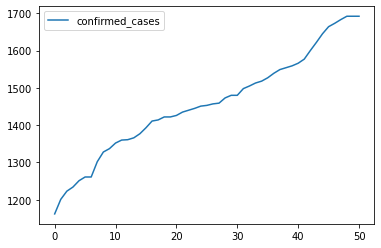

In [38]:
confirmed_cases.plot()

In [70]:
new_cases_t2wk = []
for date in response.json()['dates']:
    new_cases = response.json()['dates'][date]['countries']['Spain']['regions'][0]['sub_regions'][0]['today_new_confirmed']
    new_cases_t2wk.append({'date': date, 'total_deaths': new_cases})

In [71]:
df_new_cases = pd.DataFrame(new_cases_t2wk)
df_new_cases

,date,total_deaths
0,2021-02-17,9
1,2021-02-18,12
2,2021-02-19,10
3,2021-02-20,5
4,2021-02-21,5
5,2021-02-22,7
6,2021-02-23,11
7,2021-02-24,23
8,2021-02-25,22
9,2021-02-26,23


In [73]:
df_new_cases['date'].values

array(['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
       '2021-03-01', '2021-03-02', '2021-03-03'], dtype=object)